In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot



In [9]:
data = pd.read_csv('ParisHousing.csv')
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [43]:

from sklearn.preprocessing import StandardScaler

dt_Train, dt_Test = train_test_split(data, test_size=0.2, shuffle=False)
X_train = dt_Train.iloc[:, :16]
y_train = dt_Train.iloc[:, -1]
X_test = dt_Test.iloc[:, :16]
y_test = dt_Test.iloc[:, -1]
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = linear_model.LinearRegression().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y = np.array(y_test)
print("Thuc te        Du doan      Chenh lech")
for i in range(0,10):
    print("%.2f" % y[i],"   ",  "%.2f" % y_pred[i], "   ", abs(y[i]-y_pred[i]))

#save model vao file
import pickle
file_name = 'Liner'
with open(file_name, 'wb') as file:
    pickle.dump(clf, file)

Thuc te        Du doan      Chenh lech
5608298.70     5610340.32     2041.6193453595042
4391747.50     4390240.96     1506.5368302408606
404475.10     404691.86     216.76292700285558
4224392.30     4224466.90     74.60120068956167
6103922.80     6106390.94     2468.143980464898
830539.20     829866.85     672.3480447262991
358221.90     360601.49     2379.594540903694
1278163.10     1275317.10     2845.998839708511
4058569.20     4059207.97     638.770397904329
1697974.00     1698066.48     92.47789214598015


In [34]:
#def tinh_nse(y_test, y_pred):
    #sse = np.sum((y_test - y_pred) ** 2)
    #sst = np.sum((y_test - np.mean(y_test)) ** 2)
    #nse = 1 - (sse / sst)
    #return nse
print("Đánh giá mô hình Linear Regression bằng độ đo R2: %.12f" % r2_score(y_test, y_pred))
#print("Đánh giá mô hình Linear Regression bằng độ đo NSE: %.12f" % tinh_nse(y_test, y_pred))
print("Đánh giá mô hình Linear Regression bằng độ đo MAE: %.12f" % mean_absolute_error(y_test, y_pred))
print("Đánh giá mô hình Linear Regression bằng độ đo MSE: %.12f" % mean_squared_error(y_test, y_pred))

#R^2 va MSE cao ==> mô hình này bị overfiting

Đánh giá mô hình Linear Regression bằng độ đo R2: 0.999999503795
Đánh giá mô hình Linear Regression bằng độ đo MAE: 1590.933467423240
Đánh giá mô hình Linear Regression bằng độ đo MSE: 4098538.698714292143


In [31]:
# Lấy hệ số (coefficients) và bias (intercept)
coefficients = clf.coef_
bias = clf.intercept_

# In ra hệ số và bias
print("Các hệ số độc lập (coefficients):")
for i, coef in enumerate(coefficients):
    print(f"Hệ số của biến độc lập {i+1}: {coef}")

print(bias)


Các hệ số độc lập (coefficients):
Hệ số của biến độc lập 1: 2894857.478617102
Hệ số của biến độc lập 2: 5.399648990661859
Hệ số của biến độc lập 3: 1531.1898790773034
Hệ số của biến độc lập 4: 1573.6920559349742
Hệ số của biến độc lập 5: 1594.6063854427791
Hệ số của biến độc lập 6: -6.097881111234326
Hệ số của biến độc lập 7: 200.55815996620566
Hệ số của biến độc lập 8: -22.82851558020799
Hệ số của biến độc lập 9: -46.77905167772837
Hệ số của biến độc lập 10: 111.78414823479307
Hệ số của biến độc lập 11: 77.06737969522665
Hệ số của biến độc lập 12: 7.77461109400193
Hệ số của biến độc lập 13: -91.47707789532022
Hệ số của biến độc lập 14: -54.93601706024275
Hệ số của biến độc lập 15: -42.44331343284357
Hệ số của biến độc lập 16: 28.75774867572025
5016190.0846875


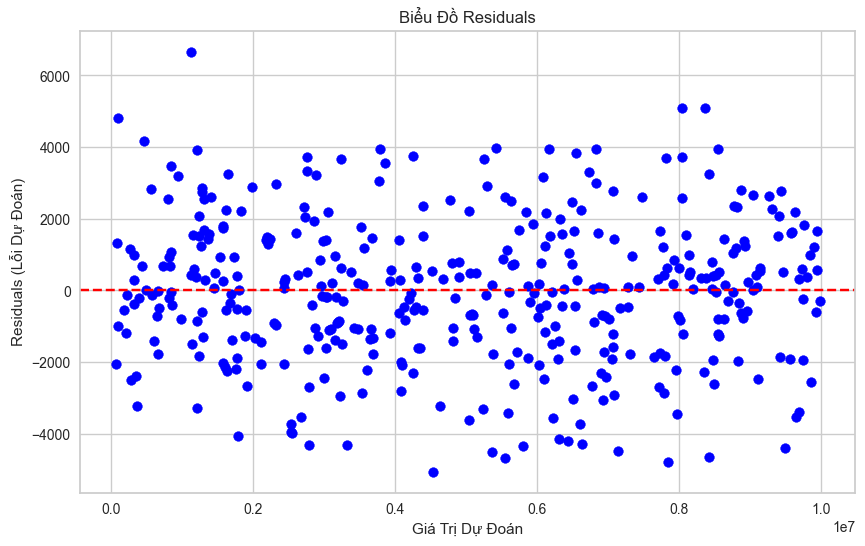

In [6]:
# Tính toán residuals
residuals = y_test - y_pred

# Tạo biểu đồ residual
plt.figure(figsize=(10, 6))

# Vẽ residualsa
plt.scatter(x = y_test, y=residuals, color='blue')

plt.axhline(y=0, color='red', linestyle='--')

# Thêm tiêu đề và nhãn
plt.title('Biểu Đồ Residuals')
plt.xlabel('Giá Trị Dự Đoán')
plt.ylabel('Residuals (Lỗi Dự Đoán)')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


<Axes: xlabel='price', ylabel='Density'>

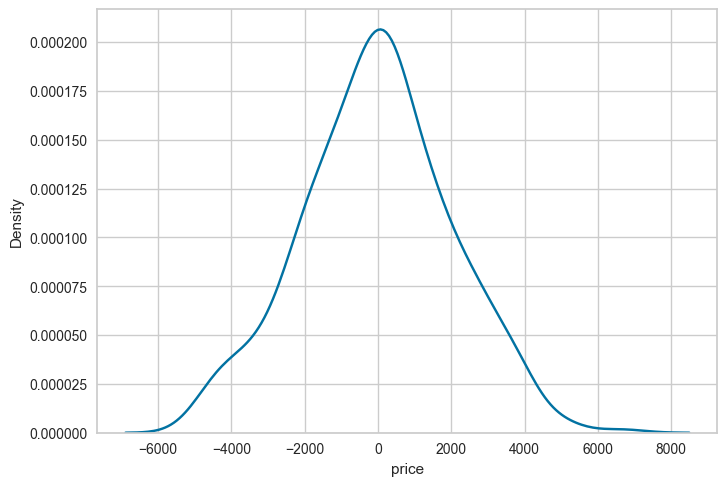

In [7]:
sns.kdeplot(residuals)

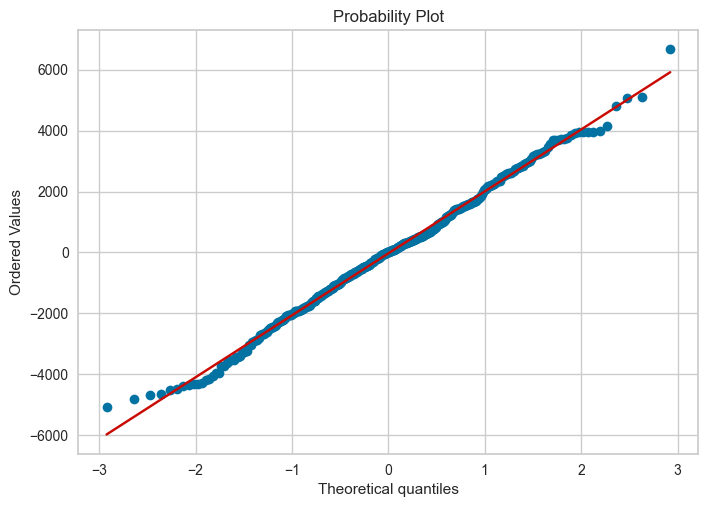

In [8]:
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt);

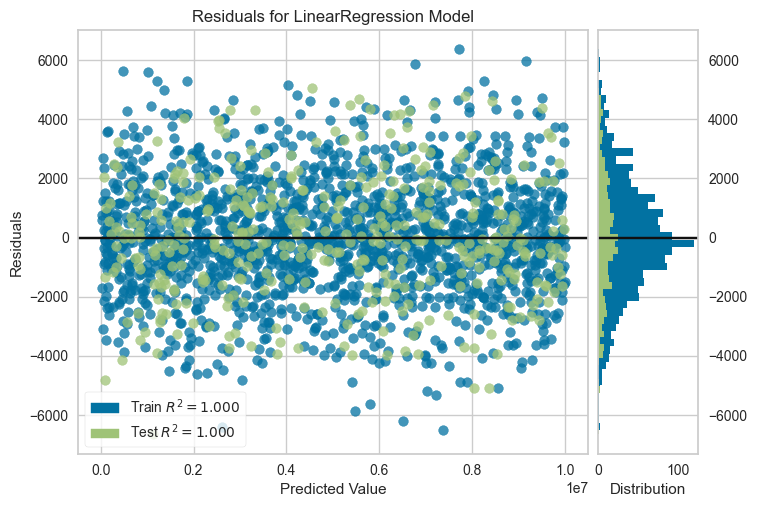

In [9]:
from yellowbrick.regressor import ResidualsPlot


model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show(); 

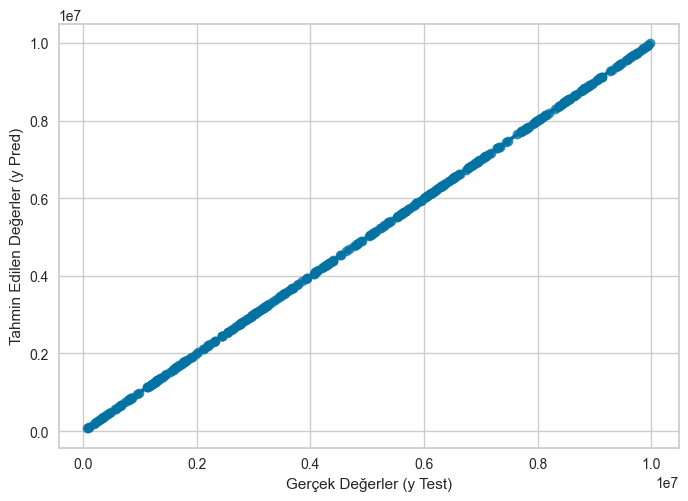

In [10]:
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

sns.regplot(data=data, x='y_test', y='y_pred', ci=None)
plt.xlabel('Gerçek Değerler (y Test)')
plt.ylabel('Tahmin Edilen Değerler (y Pred)')
plt.show()

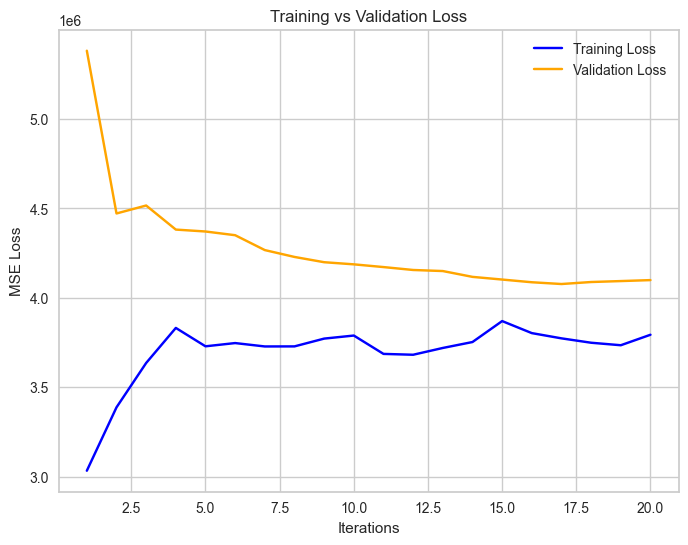

In [12]:
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_loss = []
test_loss = []

model = LinearRegression()  

# Tăng số lần lặp
n_iterations = 20  # Tăng số lần lặp để mô hình có thời gian học tốt hơn

for i in range(1, n_iterations + 1):
    # Chia nhỏ dữ liệu theo tỷ lệ cho từng lần lặp
    X_train_iter = X_train_scaled[:int(len(X_train_scaled) * (i / n_iterations))]
    y_train_iter = y_train[:int(len(y_train) * (i / n_iterations))]
    
    # Huấn luyện mô hình trên phần dữ liệu hiện tại
    model.fit(X_train_iter, y_train_iter)
    
    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_train_pred_iter = model.predict(X_train_iter)
    y_test_pred_iter = model.predict(X_test_scaled)
    
    # Tính toán lỗi MSE cho cả tập huấn luyện và kiểm tra
    train_loss.append(mean_squared_error(y_train_iter, y_train_pred_iter))
    test_loss.append(mean_squared_error(y_test, y_test_pred_iter))

# Vẽ đồ thị so sánh Training Loss và Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, n_iterations + 1), test_loss, label='Validation Loss', color='orange')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()